# Python for High Performance Computing
# The <span style="font-family: Courier New, Courier, monospace;">SciPy</span> module
<hr style="border: solid 4px green">
<br>
<center><img src="../../images/arc_logo.png"; style="float: center; width: 20%"></center>
<br>
## http://www.arc.ox.ac.uk
## support@arc.ox.ac.uk

## Overview
<hr style="border: solid 4px green">

### <span style="font-family: Courier New, Courier, monospace;">SciPy</span>  builds on <span style="font-family: Courier New, Courier, monospace;">NumPy</span>
* `NumPy` provides the framework (array classes plus methods)
* `SciPy` uses arrays for a large diversity of numerical methods
<br><br>

### <span style="font-family: Courier New, Courier, monospace;">SciPy</span> modules
* `scipy.linalg` -- linear algebra and wrappers to LAPACK & BLAS
* `scipy.sparse` -- sparse matrices and wrappers for SuperLU and Umfpack
* `scipy.integrate` -- numerical integration (ODEs)
* `scipy.interpolate` -- interpolation
* `scipy.optimize`-- optimisation
* `scipy.special` -- special functions
* `scipy.signal` -- signal processing
* `scipy.ndimage` -- n-dimensional image processing
* `scipy.fftpack` -- Fourier transforms
* `scipy.stats` -- statistical functions
* `scipy.spatial` -- spatial data structures and algorithms
* `scipy.io` -- file I/O (*e.g.* to read MATLAB files)
* `scipy.cluster` -- vector quantization / K-means
<br><br>

> Note: no PDE solvers (though other packages exist).

### Documentation
  * http://docs.scipy.org/doc/scipy/reference/tutorial/
  * http://docs.scipy.org/doc/scipy/reference/
  * http://scipy-cookbook.readthedocs.org

## Linear algebra
<hr style="border: solid 4px green">

### Dense matrix algebra
* various decompositions (QR, eigen, singular value, etc.)
* matrix exponentials, trigonometric functions
* particular matrix equations and special matrices
* low-level LAPACK and BLAS routines
<br><br>

### Sparse matrix algebra
* storage formats
* iterative algorithms
<br><br>

### Warning
* `NumPy` also covers some of the dense-matrix functionality
  * in fact, `scipy.linalg` imports most of the `numpy.linalg` functions
  * however, identically named functions from `scipy.linalg` often offer enhanced functionality
* use `SciPy` in preference to `NumPy`

## `scipy.linalg`
<hr style="border: solid 4px green">

Matrix and vector products
* `dot`, `inner`, `outer`, `matmul`

Factorisations
* `cholesky`, `qr`, `svd`

Eigenvalue problems
* `eig`, `eigh` (Hermitian matrices) compute eigenvalues and eigenvectors
* `eigvals`, `eigvalsh` compute eigenvalues only

Norms and other numbers
* `norm`, `cond`

Linear systems
* `solve` general solver (LU decomposition) 
* `lstsq` least squares solver

> *Note*: `scipy.linalg` is always built with BLAS/LAPACK support for performance, while this is optional for `numpy.linalg`.

## Example: linear systems
<hr style="border: solid 4px green">

Solve a linear system $%A\dot x=b$, where $A$ is an invertible matrix.

This is achieved using one of the `solve` direct solver available in `scipy.linalg`.

In [2]:
# NumPy needs to be imported too
import numpy as np
# import scipy.linalg
from scipy import linalg

# linear systems
A = np.array ([[3,1], [1,2]])
b = np.array([9,8])
x = linalg.solve (A, b)
print x
print linalg.norm(A.dot(x)-b)

[ 2.  3.]
0.0


## Example: linear systems (cont'd)
<hr style="border: solid 4px green">

### Caution
*Never* solve a linear system by computing the inverse $A^{-1}$ using the `linalg.inv` method:
* finding the inverse is expensive
* the solution computed is less accurate than that obtained from the solver

In [10]:
import time
N = 1000 # size of linear system
A = linalg.hilbert (N) # generate an ill-conditioned system
b = np.random.rand (N) # random RHS vector

# solve system
t = time.clock()
x = linalg.solve (A, b)
t = time.clock() - t
print "residual error:", linalg.norm (A.dot(x) - b), "solution time", t

# invert matrix and multiply b with A^{-1}
t = time.clock()
Ai = linalg.inv(A)
x = Ai.dot(b)
t = time.clock() - t
print "residual error:", linalg.norm(A.dot(x) - b), "solution time", t

residual error: 653.125272639 solution time 0.030678
residual error: 4.11857344741e+13 solution time 0.09934


## Example: linear systems (cont'd)
<hr style="border: solid 4px green">

### Caution:
Unlike other packages, `scipy.linalg.solve` does not produce a warning, even when the matrix is singular.

In [11]:
# singular matrix
A = np.array( [[1,2,3],[11,12,13],[21,22,23]] )
# matrix rank must equal matrix size for the matrix to be invertible
print "matrix rank is ", np.linalg.matrix_rank(A)
print "matrix condition number is ", np.linalg.cond(A)
# "true" solution
x0 = np.array ([1, -1,1])
print "true solution = ", x0
# RHS built from the "true" solution
b = A.dot(x0)
# solve system
x = linalg.solve (A, b)
print "computed solution = ", x

matrix rank is  2
matrix condition number is  8.68312729936e+16
true solution =  [ 1 -1  1]
computed solution =  [ 0.03719008  0.92561983  0.03719008]


## Example: linear systems (cont'd)
<hr style="border: solid 4px green">

### Condition number
The condition number of a matrix (with respect to inversion) is
* a mathematical property of the matrix (does not take into account numerical aspects, such as round-off errors)
* a measure of how inaccurate the numerical solution is -- the larger the number, the larger the error

If $cond(A)$ is
* (mathematically) infinite, $A$ is *singular*
* large, $A$ is ill-conditioned
* small, $A$ is well conditioned
<br><br>

### How large is large?
Large is problem-dependent.  A rule of thumb:
* $cond(A)\approx 1$ ideal
* $cond(A)\approx 10^3-10^6$ is (probably) manageable
* $cond(A)\approx 10^{16}$ practically means singularity
<br><br>

### In practice
* the solution of an ill-conditioned system is very sensitive to changes in the RHS
(produced by round-off errors, for instance)
* an ill conditioned system cannot be reliably solved

## Example: least squares
<hr style="border: solid 4px green">

### Task
Fit a function of known form to observed data.

Specifically, the function to fit is

$$f(x)=c_1\cdot e^{-x}+c_2\cdot x$$

The data to fit the function to is a series of pairs $(x_i, y_i)$, with $i=1, ..., N$.
The task is to find $c_1$ and $c_2$ such that the sum of squared errors

$$\sum_{i=1}^{N}\left( f(x_i)-y_i \right) ^2$$

squared is minimised.

### Least squares solution
Numerically, this is done by "solving" the system $A\cdot \mathbf{c}=\mathbf{y}$, where

\begin{equation*}
A = \begin{pmatrix}
       e^{-x_1} & x_1 \\
       e^{-x_2} & x_2 \\
       \vdots   &     \\
       e^{-x_N} & x_N
    \end{pmatrix}, \ \ \ \ \ \ \ \ \ 
\mathbf{c} = \begin{pmatrix}
               c_1 \\
               c_2
             \end{pmatrix}, \ \ \ \ \ \ \ \ \ 
\mathbf{y} = \begin{pmatrix}
               y_1    \\
               y_2    \\
               \vdots \\
               y_N
    \end{pmatrix}
\end{equation*}

$A$ is a tall skinny matrix and the system $A\cdot \mathbf{c}=\mathbf{y}$ is *over-determined*.

The solution is sought in the least-squares sense, with $\mathbf{c}$ to minimise the norm of the residual $||\mathbf{y}\ -\ A\cdot \mathbf{c}||$.

## Example: least squares (cont'd)
<hr style="border: solid 4px green">

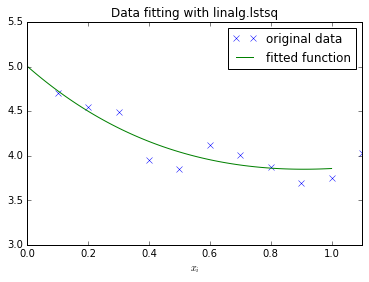

In [12]:
# least squares
%matplotlib inline
from scipy import linalg
import matplotlib.pyplot as plt

# curve parameters
c1, c2 = 5.0, 2.0

# x points
i = np.arange(1,12)

# y points are computed from an exponential expression
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
# y points are perturbed with random numbers
yi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))

# form the non-square matrix A
A = np.stack ((np.exp(-xi), xi), axis=-1)

# solve the least squares problem of minimising ||b-A*c||
c, resid, rank, sigma = linalg.lstsq(A, yi)

# prepare data for a plot of the fitted function
# (using the calculated coefficients)
xi2 = np.linspace (0.0, 1.0, 100)
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

# plot everything
plt.plot (xi,yi,'x', label="original data")
plt.plot (xi2,yi2, label="fitted function")
plt.axis ([0,1.1,3.0,5.5])
plt.xlabel ('$x_i$')
plt.legend ()
plt.title ('Data fitting with linalg.lstsq')
plt.show ()

## Example: eigenvalue problem
<hr style="border: solid 4px green">

Find the eigenvalues and eigenvectors of a general matrix.

In [3]:
# random square matrix
A = np.random.randn(10, 10)
# compute eigenvalues L and eigenvectors
L, V = linalg.eig (A)
print "eigenvalues =", L
# the difference between A*V and V*L should be zero
D = A.dot(V) - V.dot(np.diag(L))
# and indeed, it is -- close to machine precision
print "error measure = ", linalg.norm (D)

eigenvalues = [-4.31055543+0.j         -0.05536850+2.93762209j -0.05536850-2.93762209j
  1.00659075+2.07361102j  1.00659075-2.07361102j -0.99163755+0.64368154j
 -0.99163755-0.64368154j  0.98588354+0.j          0.10427473+1.18727979j
  0.10427473-1.18727979j]
error measure =  1.30569270026e-14


## Floating point arthmetic
<hr style="border: solid 4px green">

### The difference is not zero!  What's wrong?
* nothing is wrong
  * numbers are stored with limited accuracy and
  * results are close to but not equal to exact calculations
* the results above are equal to within machine accuracy
* a measure for this is the *machine epsilon*.
<br><br>

### Machine epsilon $\epsilon$
* definition: an upper bound on the relative error due to rounding in floating point arithmetic
* alternative definition: the smallest number represented in floating point arithmetic that, when added to one, yields a result different from one

In [18]:
print "double precision machine eps =", np.finfo(np.float64).eps
print "single precision machine eps =", np.finfo(np.float32).eps

double precision machine eps = 2.22044604925e-16
single precision machine eps = 1.19209e-07


### In practice
* errors accumulate, so the difference expected to be zero cannot be $\epsilon$
* a difference of `1e-12` to `1e-14` means *zero* (double precision)

## Sparse linear algebra
<hr style="border: solid 4px green">

### Sparse matrices
* occur frequently in computational Physics, Engineering, *etc.*
* matrices with a significant number of zero entries
* the sparsity is exploited
  * special storage (the zeros are not stored!)
  * special numerical algorithms
<br><br>

### `scipy.sparse.linalg`
* matrix operations
* matrix norms
* linear systems: CG, BiCG, MINRES, GMRES
* least squares
* matrix factorisations: LU, eigenvalues, SVD

## Example: sparse eigenvalue problem
<hr style="border: solid 4px green">

Consider the 1D wave equation
$$\frac{\partial^2 U}{\partial t^2}=c^2\frac{\partial^2 U}{\partial x^2}$$

One solution is to consider eigenmodes
$$U(x,t)=u(x)\cdot e^{i\omega t}$$

Thie leads to the eigenvalue problem
Solution to 1D Helmholtz equation

$$\frac{d^2 u}{dx^2} + \kappa^2 u=0, \ \ \ \ \ \ \ \kappa=\omega / c$$

Finite difference approximation of the derivative
* leads to an matrix eigenvalue problem
* the matrix has a well-defined structure and is sparse

The first few eigenvectors (corresponding to the lowest eigenvalues) can be easily recognised as the first modes of vibration of a string.

## Example: sparse eigenvalue problem (cont'd)
<hr style="border: solid 4px green">

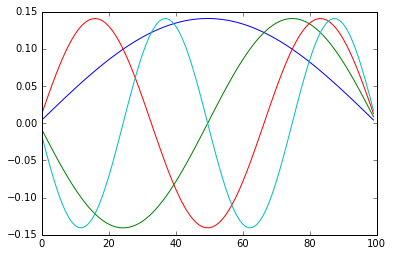

In [20]:
%matplotlib inline
import numpy as np
from scipy import sparse as sp
from scipy.sparse import linalg as sl
import matplotlib.pyplot as plt

# number of points in the discretisation
N = 100

# the matrix arising from the finite difference approximation of the derivative
A = sp.diags ([-1, +2, -1], [-1, 0, 1], shape=[N, N])

# compute the first 4 eigenpairs (with the smallest eigenvalues)
S, V = sl.eigsh (A, k=4, which="SM")

# plot the eigenvectors
for k in range(4):
    plt.plot (V[:,k])
plt.show ()

## Example: sparse linear system
<hr style="border: solid 4px green">

### Sparse linear systems are large
* direct numerical solutions
  * are expensive
  * destroy sparsity
* solutions are predominantly iterative
  * start with a guess
  * keep iterating until a tolerance is achieved on the residual norm

### This example
* build a linear system using the same sparse matrix as in the eigenvalue problem above
* solve it using (from most general to most specialised)
  * the direct method dense matrices `scipy.linalg.solve`
  * the **C**onjugate **G**radients (CG) solver `scipy.sparse.linalg.cgs`
  * the specialised direct method for banded, positive definite matrices `scipy.linalg.solveh_banded`

## Example: sparse linear system (cont'd)
<hr style="border: solid 4px green">

In [4]:
import time
import numpy as np
from scipy import linalg as la
from scipy import sparse as sp
from scipy.sparse import linalg as sl

# size of the matrix
N = 10000
# the matrix
A = sp.diags ([-1, +2, -1], [-1, 0, 1], shape=[N, N])
# "true" solution
x0 = np.ones (N)
# right-hand side
b = A.dot (x0)

# method 1: direct method dense matrices
# --------------------------------------
start_time = time.clock()
x = la.solve (A.toarray(), b)   # A is "cast" to full storage
elapsed_time = time.clock() - start_time
err = np.sum(np.abs(x - x0))
print 'LU time, error          :  %9.6f    %g' % (elapsed_time, err)

# method 2: conjugate gradients
# -----------------------------
start_time = time.clock()
x, info = sl.cgs (A, b, tol=1e-12)
elapsed_time = time.clock() - start_time
err = np.sum(np.abs(x - x0))
print 'CG time, ret code, error:  %9.6f %2d %g' % (elapsed_time, info, err)

# method 3: banded solver
# -----------------------
# matrix has to be stored in band mode (see documentation)
A = np.empty((2,N))
A[0,:] = +2.0   # first line stores main diagonal
A[1,:] = -1.0   # second line stores the under-diagonal values
start_time = time.clock()
x = la.solveh_banded (A, b, lower=True)
elapsed_time = time.clock() - start_time
err = np.sum(np.abs(x - x0))
print 'banded solution time, error:  %9.6f    %g' % (elapsed_time, err)

LU time, error          :  17.387820    8.28364e-08
CG time, ret code, error:   4.264050  0 2.62206e-09
banded solution time, error:   0.015392    8.27622e-08


## `scipy.integrate`: integration
<hr style="border: solid 4px green">

* numerical integration (single, double and triple integrals)
* **O**rdinary **D**ifferential **E**quations (ODEs) with initial conditions

## Example: double integral
<hr style="border: solid 4px green">

Calculate $\pi$ using the double integral for the area of a circle with radius $r$: <br>

$$
\int _{x_{min}} ^{x_{max}}\, dx \int _{g(x)} ^{h(x)} f(x,y) \, dy = \int _{-r} ^{r} \int _{-\sqrt(r^2-x^2)} ^{\sqrt(r^2-x^2)} 1 \, dx\, dy = \pi r^2
$$

First, define appropriate functions for the integral method.

In [5]:
# numerically integrate using dblquad()
import numpy as np
from scipy.integrate import dblquad

# order of variables matters! y before x
def integrand (y, x):
    return 1

def xminlim (x, r):
    return -1*np.sqrt (r*r - x*x)

def xmaxlim (x, r):
    return np.sqrt (r*r - x*x)

# integral for the area of a circle with radius r
def integrate_to_pi (r):
    (area,err) = dblquad (integrand, -1*r, r,
                          lambda x: xminlim(x,r),
                          lambda x: xmaxlim(x,r))
    return area / (r*r)

## Example: double integral (cont'd)
<hr style="border: solid 4px green">

### `lambda`
* construct to create anonymous functions (*i.e.* functions that are not bound to a name) at runtime
* derived from lambda expressions in functional programming languages

Now, compute the result and compare with the standard value provided by `numpy.pi`.

In [7]:
# calculate pi using numerical integration
print integrate_to_pi (1.0)

# compare with numpy pi
print (np.pi - integrate_to_pi(1.0))

3.14159265359
-3.5527136788e-15


## Exercise: double integral
<hr style="border: solid 4px green">

Calculate the double integral

$$
\int_0^{\pi/2} dx \int_0^1 dy \quad f(x,y)
$$

where $f(x,y) = y sin(x)$. The answer should be 1/2.

In [8]:
# use the same approach here as above

def integrand1(y,x):
    return y*np.sin(x)

area, err = dblquad (integrand1, 0.0, 0.5*np.pi, lambda x: 0.0, lambda x: 1.0)
print area, err

0.5 5.55111512313e-15


## Solution : double integral
<hr style="border: solid 4px green">

In [16]:
# %load integration.py
# Integral x = [0, pi/2] y = [0, 1] f(x,y) = ysin(x)
# numerically solve the integral using dblquad

import numpy as np
from scipy.integrate import dblquad

# order of arguments matters!
def integrand(y,x): 
    return y*np.sin(x)

# integrate f(x, y) = y * sin (x)
def integrate_this(): 
    (area,err) = dblquad(integrand, 0,np.pi/2, 
                         lambda x: 0, 
                         lambda x: 1)
    return area

integrate_this()


0.5

## Example: solution of an ODE
<hr style="border: solid 4px green">

### The problem
A point mass, $m$, is attached to the end of a massless rigid rod of length $l$.

The pendulum is acted on by gravity and friction and the motion of the pendulum is described by the angle $\theta$ the rod makes with the vertical.

<img src="./images/pendulum.png"; style="float: right; width: 40%; margin-right: 3%; margin-top: 0%; margin-bottom: -1%">  <br>

Assuming the angle $\theta$ is small, we can write a second-order differential equation to describe the motion using Newton's 2nd law of motion in terms of $\theta$:

$$
\ddot{\theta} = -\frac{g}{l}\,\theta - \frac{b}{m}\,\dot\theta
$$

where $b$ is a constant of friction and $b \ll g$.

To use `odeint`, we rewrite the above equation as 2 first-order differential equations:

$
\dot{\theta} = \omega
$

$
\dot{\omega}= -\frac{g}{l}\,\theta - \frac{b}{m}\,\omega
$
<br>
<br>

Define the ODE as a function and set up parameters and initial values.

## Example: solution of an ODE (cont'd)
<hr style="border: solid 4px green">

In [9]:
# ode as a function

# let y be vector  [theta, omega]
def pendulumNumerical(y, t, b, m, g, l):
    theta, omega = y
    dydt = [omega, -(b/m)*omega - (g/l)*(theta)]
    return dydt

# Parameters and initial values
m = 1.0                # mass of bob
l = 1.0                # length of pendulum
b = 0.25               # friction constant
g = 9.81               # gravitational constant
theta0 = np.pi-0.01    # initial angle
w0 = 0.0               # initial omega

# create a vector with the initial angle and initial omega
y0 = [theta0, w0]

# time interval
stoptime = 10         # total number of seconds
numpoints = 101       # number of points interval

t = np.linspace(0, stoptime, numpoints);

# ODE solver parameters
abserr = 1.0e-8      # absolute error tolerance
relerr = 1.0e-6      # relative error tolerance

# import odeint solver
from scipy.integrate import odeint

# get solution. Note args are given as a tuple
solution = odeint (pendulumNumerical, y0, t, args=(b,m,g,l),atol=abserr, rtol=relerr)

## Example: solution of an ODE (cont'd)
<hr style="border: solid 4px green">

The pendulum ODE can also be solved analytically.  The exact solutions for $\theta$ and $\omega$ are:

In [10]:
# Exact solution for theta
def pendulumTheta(t, theta0, b, m, g, l):
    root = np.sqrt( np.abs( (b*b)-4*g*m*m/l ) )
    sol = theta0*np.exp(-b*t/2)*( np.cos( root*t/2 ) + (b/root)*np.sin( root*t/2) )
    return sol

# Exact solution for omega
def pendulumOmega(t, theta0, b, m, g, l):
    root = np.sqrt( np.abs( (b*b)-4*g*m*m/l ) )
    sol = -(b/2)*theta0*np.exp(-b*t/2)*( np.cos( root*t/2 ) + (b/root)*np.sin( root*t/2) ) + (theta0/2)*np.exp(-b*t/2)*( b*np.cos( root*t/2 ) - root*np.sin( root*t/2) )
    return sol

## Exercise: pendulum
<hr style="border: solid 4px green">

* To see how good the numerical solution, plot the exact $\theta$ and $\omega$ against the numerical solution for the appropriate range of $t$.

* You should include a legend to label the different lines/points.

* You should find that the numerical solution looks quite good. Can you adjust the parameters above (re-execute all the relevant cells) to make it worse?

## Solution: pendulum
<hr style="border: solid 4px green">

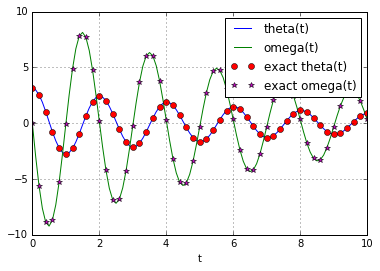

In [13]:
# %load pendulum.py
# Plot the numerical and exact solutions for a simple pendulum

# to inline plots in a notebook, uncomment line below
# %matplotlib inline
%matplotlib inline


import numpy as np

import matplotlib.pyplot as plt
plt.plot(t, solution[:, 0], 'b', label='theta(t)')
plt.plot(t, solution[:, 1], 'g', label='omega(t)')
plt.plot(t[0::2], pendulumTheta(t[0::2],theta0,b,m,g,l), 'ro', label='exact theta(t)')
plt.plot(t[0::2], pendulumOmega(t[0::2],theta0,b,m,g,l), 'm*', label='exact omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()


## `scipy.optimize`: optimisation
<hr style="border: solid 4px green">

* local and global optimisation
  * unconstrained and constrained
  * multi-dimensional
* least squares
* general purpose root finding

## Example: 1D unconstrained optimisation
<hr style="border: solid 4px green">

Find the minimum of

$
f(x) = x^4 + 3(x-2)^3 - 15x^2 + 1
$

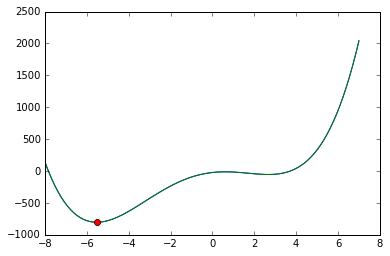

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

# the function to optimise
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x**2) + 1

# plot the function
x = np.linspace (-8, 7, 100)
plt.plot (x, f(x))

# unconstrained optimisation, derivative free
# (Brent algorithm, combining a bracketing strategy with a parabolic approximation)
res = opt.minimize_scalar (f, method="Brent")
plt.plot (res.x, f(res.x), "ro")
if res.success:
    plt.plot (x, f(x))
    plt.plot (res.x, f(res.x), "ro")
else:
    print res.message

## Example: 1D constrained optimisation
<hr style="border: solid 4px green">

Same as above but with the constraint $0\leq x\leq 6$

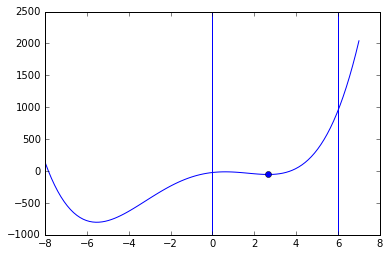

In [24]:
# constrained optimisation, derivative free
xmin, xmax = 0, 6
res = opt.minimize_scalar (f, method="bounded", bounds=[xmin, xmax])
if res.success:
    plt.plot (x, f(x))
    plt.plot (res.x, f(res.x), "bo")
    for x in [xmin, xmax]:
        plt.axvline (x=x)
else:
    print res.message

## Example: 2D unconstrained optimisation
<hr style="border: solid 4px green">

Find the unconstrained minimum of the Rosenbrock "banana" function

$
f(x, y) = (a - x)^2 + b(x^2 - y)^2
$

with parameters $a$ and $b$ controlling how well conditioned the function is, *i.e.* how easy it is to minimise.

The standard function takes $a=1$ and $b=100$.

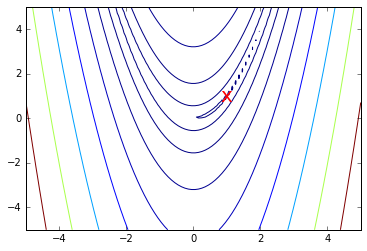

In [18]:
# allow matplotlib insert plot into notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

# the Rosenbrock function, its derivative and Hessian are already defined
from scipy.optimize import rosen, rosen_der, rosen_hess

# represent function and its minimum using contours
nx, ny = 100, 100
xx = np.linspace (-5, 5, nx)
yy = np.linspace (-5, 5, ny)
X, Y = np.meshgrid (xx, yy)
Z = rosen (np.vstack([X.ravel(), Y.ravel()])).reshape((nx, ny))

# Note: the global minimum is at (1,1) in a tiny contour island
#       (the contours need be closely packed together)
plt.contour (X, Y, Z, np.arange(10)**5)
plt.text (1, 1, 'x', va='center', ha='center', color='red', fontsize=20);

## Example: 2D unconstrained optimisation (cont'd)
<hr style="border: solid 4px green">

Before anything, define a common starting point for all optimisation.

In [19]:
# initial starting position
x0 = np.array ([+4., -4.])

Then, define a callback  function to store intermediate positions found.

In [20]:
def rosen_reporter (p):
    """reporter function to store intermediate states of optimisation"""
    global xp
    xp.append (p)

## Example: 2D unconstrained optimisation (cont'd)
<hr style="border: solid 4px green">

Now, find the minimum using a Newton-CG algorithm
* each step solves $H\Delta x=-g$, where $H$ is the Hessian and $g$ the gradient
* the linear system is solved using the **C**onjugate **G**radient method

In [22]:
# reset storage of intermediary positions
xp = [x0]
# optimise starting from x00]
opt.minimize (rosen, x0, method="BFGS", jac=rosen_der, callback=rosen_reporter)

      fun: 2.50756439266827e-14
 hess_inv: array([[ 0.49981937,  0.99972882],
       [ 0.99972882,  2.00446182]])
      jac: array([  6.34185707e-06,  -3.16418594e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 44
     njev: 60
   status: 0
  success: True
        x: array([ 1.00000001,  1.        ])

## Example: 2D unconstrained optimisation (cont'd)
<hr style="border: solid 4px green">

Plot the optimisation history

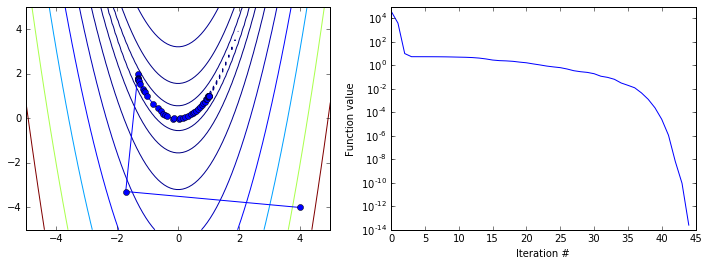

In [23]:
# all intermediary points
xp = np.array (xp)

plt.figure (figsize=(12,4))
plt.subplot (121)
# plot the contours
plt.contour (X, Y, Z, np.arange(10)**5)
# plot all intermediary points
plt.plot (xp[:, 0], xp[:, 1], "-o")
plt.subplot (122)
# plot minimisation history
plt.semilogy (range(len(xp)), rosen(xp.T))
plt.xlabel ("Iteration #")
plt.ylabel ("Function value")

## Exercise
<hr style="border: solid 4px green">

The Rosenbrock function is a textbook example, with readily available gradient and Hessian.  These are not always available.

Change the cell above to perform the same optimisation using the **B**royden--**F**letcher--**G**oldfarb--**S**hanno algorithm (`method="BFGS"`) , which only requires the gradient -- the Hessian is approximated on-the-fly.

Then, change the cell to optimise using the Nelder--Mead simplex algorithm (`method="nelder-mead"`).  This heuristic algorithm uses only function evaluations and no gradient information.

How does the iteration history change?

## Example: 2D constrained optimisation
<hr style="border: solid 4px green">

> *Note*: inconclusive example; left out.

Minimise the Rosenbrock function with a box constraint
$$
\begin{align}
+1.0 &\leq x\leq +4.2 \\
-4.2 &\leq y\leq -1.2
\end{align}
$$

And an inequality constraint
$$y \leq x^2 - 1$$.

This has to be input as $constr(x) = x^2 - y - 1 \geq 0$ in the optimiser.

In [41]:
# bound costraints
bnds = ((+1.0, +4.2), (-4.2, -1.2))

# inequality constraints
cons = ({ "type": "ineq",
          "fun": lambda x: np.array( ([ x[0]**2 - x[1] - 1 ]) ) })

Optimise using the above constraints.

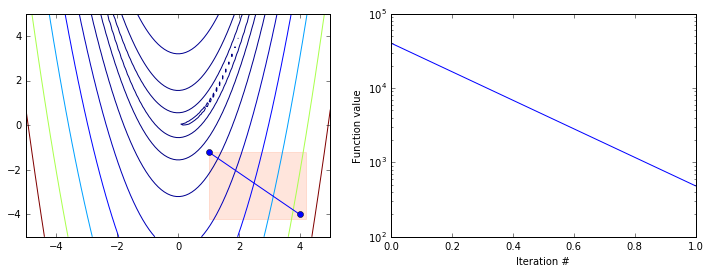

In [42]:
# reset storage of intermediary positions
#x0 = np.array ([-2., +4.])
xp = [x0]

# optimise starting from x0
opt.minimize (rosen, x0, bounds=bnds, callback=rosen_reporter)
#opt.minimize (rosen, x0, bounds=bnds, constraints=cons, callback=rosen_reporter)


# all intermediary points
xp = np.array (xp)

plt.figure (figsize=(12,4))
plt.subplot (121)
# plot the contours
plt.contour (X, Y, Z, np.arange(10)**5)
# plot the bound constraint
plt.fill ([ bnds[0][0],bnds[0][0],bnds[0][1],bnds[0][1] ],
          [ bnds[1][0],bnds[1][1],bnds[1][1],bnds[1][0] ],
          color="coral", alpha=0.2)
# plot the inequality constraint
inqx = np.linspace (-1.0, 0.0, 64)
#plt.plot (inqx, (inqx - 2.0)**2 -7, "k--")
# plot all intermediary points
plt.plot (xp[:, 0], xp[:, 1], "-o")
plt.subplot (122)
# plot minimisation history
plt.semilogy (range(len(xp)), rosen(xp.T))
plt.xlabel ("Iteration #")
plt.ylabel ("Function value")

## Example: least-squares fit
<hr style="border: solid 4px green">

Use `scipy.optimize.leastsq` to fit some measured data, $\{x_i,\,y_i\}$, to a function.  In this case, choose the function

$$
y\,=\,A\,\sin(2\pi k x \,+\, \theta)
$$

where the parameters $A$, $k$, and $\theta$ are unknown.  The residual vector, that will be squared and summed by `leastsq` to fit the data, is:

$$
e_i\,=\, ∣∣ \, y_i \,− \,A\sin(2\pi k x_i + \theta)∣∣
$$

By defining a function to compute the residuals, $e_i$, and, selecting appropriate starting values, `leastsq` can be used to find the best-fit parameters $\hat{A}$, $\hat{k}$, $\hat{\theta}$.

Create a sample of true values, and the "measured" (noisy) data.

Also, define the starting values for the minimisation.

In [24]:
# set up true function and "measured" data
x = np.arange(0, 6e-2, 6e-2 / 30)
A, k, theta = 10, 1.0 / 3e-2, np.pi / 6

y_true = A * np.sin(2.0*np.pi*k*x + theta)
y_meas = y_true + 2.0*np.random.randn(len(x))

# starting values of A, k and theta
p0 = [8, 1 / 2.3e-2, np.pi / 3]
print(np.array(p0))

[  8.          43.47826087   1.04719755]


## Example: least-squares fit (cont'd)
<hr style="border: solid 4px green">

Define the residual function and initial values.

In [25]:
# function to compute the residual to minimise
def residuals (p, y, x):
    A, k, theta = p
    err = y - A * np.sin(2 * np.pi * k * x + theta)
    return err

For easy evaluation of the model function parameters [A, K, theta], we define a function.

In [26]:
def peval (x, p):
    return p[0]*np.sin(2.0*np.pi*p[1]*x + p[2])

Now, perform the least squares fitting.

In [27]:
# do least squares fitting
from scipy.optimize import leastsq

plsq = leastsq(residuals, p0, args=(y_meas, x))
print(plsq[0])
print(np.array([A, k, theta]))

[-10.72238558  33.5432442    3.66112626]
[ 10.          33.33333333   0.52359878]


## Example: least-squares fit (cont'd)
<hr style="border: solid 4px green">

Finally, plot results.

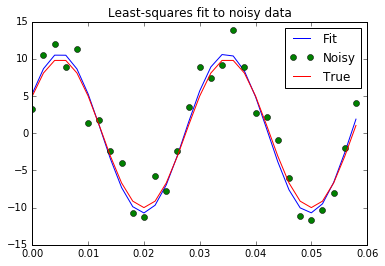

In [28]:
# and plot the true function, measured (noisy) data 
# and the model function with fitted parameters 
plt.plot(x, peval(x, plsq[0]), x, y_meas, 'o', x, y_true)

plt.title('Least-squares fit to noisy data')
plt.legend(['Fit', 'Noisy', 'True'])
plt.show()

## `scipy.fftpack`: fast Fourier transform
<hr style="border: solid 4px green">

### Fourier transform
The *space domain* (or time domain) function $f(x)$ is transformed into the *frequency domain* function

$F(\omega)=\int_{-\infty}^{+\infty}f(x)\cdot e^{-2i\pi\omega t}\ \ dt$
<br><br>

### Discrete Fourier tranform
The *discrete* equivalent of the above

$X_k=\sum_{n=0}^{N-1} x_n\cdot e^{-2\pi ikn/N}$
<br><br>


### `scipy.fftpack`

`scipy.fftpack` -- discrete Fourier transform
* fast Fourier transforms
  * `fft`, `ifft` -- 1D transforms
  * `fft2`, `ifft2` -- 2D transforms
  * `fftn`, `ifftn` -- N-dimensional transforms
* differential and pseudo-differential operators
  * `diff` -- k-th derivative (or integral) of a periodic sequence
* helper functions
  * `fftshift` -- shift the zero-frequency component to the center of the spectrum
  * `ifftshift` -- the inverse operation of `fftshift`

`scipy.fftpack.convolve` -- convolutions
* `convolve` wrapper for convolve

## Example: 1D Fourier transform
<hr style="border: solid 4px green">

To understand how `scipy.fftpack` works, we first look at a simple 1D example.

First, create a 1D harmonic signal.

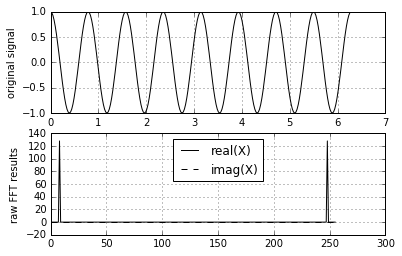

In [30]:
%matplotlib inline

import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

# sampling frequency
s = 256
# timestep
dt = 1.0 / s
# time vector
t = 2.0 * np.pi * np.arange (0.0, 1.0, dt)
# signal
x = np.cos (8.0*t)
# signal length
N = x.size

# raw fftw data
X = fft(x)

# plot results
plt.subplot (211)
plt.plot (t,x, "k-")
plt.xlabel ("time")
plt.ylabel ("original signal")
plt.grid ()

plt.subplot (212)
plt.plot (np.real(X), "k-",  label="real(X)")
plt.plot (np.imag(X), "k--", label="imag(X)")
plt.legend (loc=9)
plt.ylabel ("raw FFT results")

plt.grid ()

## Example: 1D Fourier transform (cont'd)
<hr style="border: solid 4px green">

### The DFT
The original signal is

$x_n = \cos(k t_n) = \frac{1}{2}e^{+i k t_n}+\frac{1}{2}e^{-i k t_n}$

so, the expected transform is

$X_{-k} = X_{+k} = \frac{1}{2}$

### `scipy.fftpack`

The raw results represent
* `X[0]` -- the zero-frequency term which, the mean of the signal
* `X[1:N/2]` -- the positive-frequency terms
* `X[N/2+1:]` -- the negative-frequency terms in the order of *decreasing* negative frequency
  * `X[(N-1)/2]` -- the largest positive frequency (for an odd number of input points)
  * `X[N/2]` -- the Nyquist frequency term (for an even number of input points)
  * `X[(N+1)/2]` -- the largest negative frequency (for an odd number of input points)
* `abs(X)` -- amplitude spectrum
* `abs(X)^2` -- power spectrum
* `angle(X)` -- phase spectrum
<br><br>

Useful functions
* `fftfreq(n)` -- returns an array containing the frequencies (cycles per unit of the sample spacing) of corresponding elements in the output
* `fftshift(X)` -- shifts transforms and their frequencies to put the zero-frequency components in the middle

## Example: 1D Fourier transform (cont'd)
<hr style="border: solid 4px green">

The above can be used for a more meaningful plot

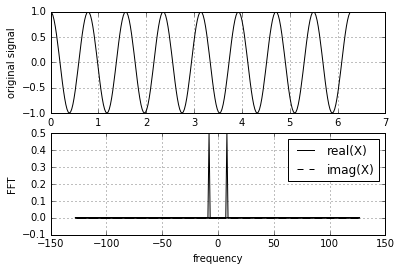

In [31]:
from scipy.fftpack import fftshift

# calculate associated frequencies
f = np.fft.fftfreq (N, dt)
# scale raw fftw data
X = X / N

# plot results
plt.subplot (211)
plt.plot (t,x, "k-")
plt.xlabel ("time")
plt.ylabel ("original signal")
plt.grid ()

plt.subplot (212)
plt.plot (f,np.real(X), "k-",  label="real(X)")
plt.plot (f,np.imag(X), "k--", label="imag(X)")
plt.legend (loc=1)
plt.xlabel ("frequency")
plt.ylabel ("FFT")
plt.grid ()

plt.show ()

## Example: 2D Fourier transform #1
<hr style="border: solid 4px green">

### Every picture is made of waves
* any variation (even discontinuous!) can be decomposed into Fourier components
* 2D image --> FFT --> features can be picked up
* https://www.youtube.com/watch?v=YYGltoYEmKo

In [32]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

img = plt.imread("./images/fence.jpg")

Then, appy Fourier transform to the image and plot its Fourier transform.

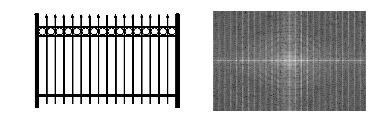

In [33]:
# 2D fourier transform of the image
F = fftpack.fft2 (img)

# shift spectrum so that low spatial frequencies are in the center
F = fftpack.fftshift (F)

# the 2D power spectrum is
P = np.abs (F)

# plot the 2D power spectrum
plt.subplot (121)
plt.imshow (img, cmap=cm.gray); plt.axis('off')
plt.subplot (122)
plt.imshow (100.0*np.log10(P), cmap=cm.gray); plt.axis('off')
plt.show ()

## Example: 2D Fourier transform #2
<hr style="border: solid 4px green">

### Every picture is made of waves
* create a power spectrum and apply an *inverse* Fourier transform to get to the *space domain*
* the power spectrum is zero everywhere except at isolated frequencies

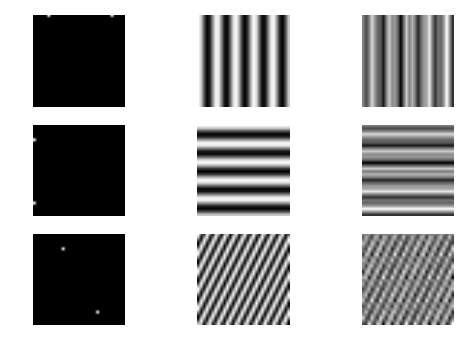

In [52]:
%matplotlib inline

import numpy as np
from scipy.fftpack import ifft2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

N = 32

xf = np.zeros((N,N))
xf[0, 5]   = 1
xf[0, N-5] = 1
Z = ifft2 (xf)
plt.subplot (331); plt.imshow (xf, cmap=cm.gray);         plt.axis('off')
plt.subplot (332); plt.imshow (np.real(Z), cmap=cm.gray); plt.axis('off')
plt.subplot (333); plt.imshow (np.imag(Z), cmap=cm.gray); plt.axis('off')

xf = np.zeros((N, N))
xf[5, 0]   = 1
xf[N-5, 0] = 1
Z = ifft2 (xf)
plt.subplot (334); plt.imshow (xf, cmap=cm.gray);         plt.axis('off')
plt.subplot (335); plt.imshow (np.real(Z), cmap=cm.gray); plt.axis('off')
plt.subplot (336); plt.imshow (np.imag(Z), cmap=cm.gray); plt.axis('off')

xf = np.zeros((N, N))
xf[5, 10]     = 1
xf[N-5, N-10] = 1
Z = ifft2 (xf)
plt.subplot (337); plt.imshow (xf, cmap=cm.gray);         plt.axis('off')
plt.subplot (338); plt.imshow (np.real(Z), cmap=cm.gray); plt.axis('off')
plt.subplot (339); plt.imshow (np.imag(Z), cmap=cm.gray); plt.axis('off')

plt.show ()

## Example: using 2D Fourier transform to filter
<hr style="border: solid 4px green">

Start with an image and filter out the
* high frequency (highpass filter)
* low frequency (lowpass filter)

/Users/mihai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/mihai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:46: ComplexWarning: Casting complex values to real discards the imaginary part


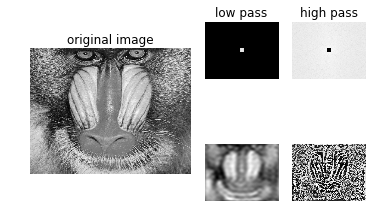

In [34]:
import numpy as np
import scipy.fftpack as fp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# load the data...
img = plt.imread ("./images/mandrill.png")
# transform the RGB contents to gray using the PAL/NTSC scheme
# (https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale)
z = 0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2]

# fft transform
Z = fp.fft2 (z)
# center the transform on the zero frequency content of the image
Z = fp.fftshift (Z)
# size of the fft data
nx,ny = Z.shape

# pick up a size for the frequency window
fw = 12
# find the limits of the frequency window
if nx%2 == 0: # nx is even, zero frequency is at nx/2
    fx1 = nx/2 - fw
    fx2 = nx/2 + fw
else:
    fx1 = (nx-1)/2 - fw
    fx2 = (nx+1)/2 + fw

if ny%2 == 0: # ny is even, zero frequency is at ny/2
    fy1 = ny/2 - fw
    fy2 = ny/2 + fw
else:
    fy1 = (ny-1)/2 - fw
    fy2 = (ny+1)/2 + fw

# keep only low frequency data
Z_low = np.zeros(Z.shape, dtype=complex)
Z_low[fx1:fx2, fy1:fy2] = Z[fx1:fx2, fy1:fy2]
z_low = fp.ifft2 (fp.ifftshift (Z_low))
z_low = (z_low * 255).astype(np.uint8)

# keep only high frequency data
Z_high = Z.copy()
Z_high[fx1:fx2, fy1:fy2] = np.complex(0.0)
z_high = fp.ifft2 (fp.ifftshift (Z_high))
z_high = (z_high * 255).astype(np.uint8)

# plot everything
fig = plt.figure ()

ax1 = plt.subplot2grid ((2, 4), (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid ((2, 4), (0, 2), colspan=1, rowspan=1)
ax3 = plt.subplot2grid ((2, 4), (1, 2), colspan=1, rowspan=1)
ax4 = plt.subplot2grid ((2, 4), (0, 3), colspan=1, rowspan=1)
ax5 = plt.subplot2grid ((2, 4), (1, 3), colspan=1, rowspan=1)

ax1.imshow(z, cmap=cm.gray); ax1.axis("off"); ax1.set_title("original image")

ax2.imshow(np.log10(abs(Z_low)+1.e-16),  cmap=cm.gray); ax2.axis("off"); ax2.set_title("low pass");
ax3.imshow(z_low,                        cmap=cm.gray); ax3.axis("off")

ax4.imshow(np.log10(abs(Z_high)+1.e-16), cmap=cm.gray); ax4.axis("off"); ax4.set_title("high pass");
ax5.imshow(z_high,                       cmap=cm.gray); ax5.axis("off")

plt.show()

## Example: using 2D Fourier transform image blur
<hr style="border: solid 4px green">

Image blur
* a lowpass filter, which removes the high frequenmcy content
* achieved via convolution using a "kernel" function
* the kernel is a "smooth" function (unlike the previous example)
<br><br>

The convolution theorem
$$\mathcal{F}(f*g)=\mathcal{F}(f)\cdot\mathcal{F}(g)$$
<br><br>

The Fourier transform of the kernel $g$ is non-zero only around zero-frequency.

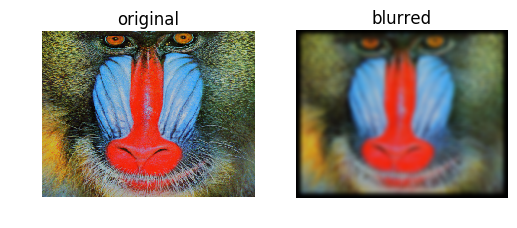

In [54]:
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt

# read image
img_orig = plt.imread ("./images/mandrill.png")

# make some kind of kernel, there are many ways to do this...
t = 1 - np.abs(np.linspace(-1, 1, 21))
kernel = t.reshape(21, 1) * t.reshape(1, 21)
kernel /= abs(kernel).sum()   # kernel should sum to 1!

# convolve 2d the kernel with each channel
r = sg.convolve2d(img_orig[:,:,0], kernel)
g = sg.convolve2d(img_orig[:,:,1], kernel)
b = sg.convolve2d(img_orig[:,:,2], kernel)

# stack the channels back into a 8-bit colour depth image and plot it
img_blur = np.dstack([r, g, b])
img_blur = (img_blur * 255).astype(np.uint8)

plt.subplot(1,2,1); plt.imshow(img_orig); plt.axis("off"); plt.title("original")
plt.subplot(1,2,2); plt.imshow(img_blur); plt.axis("off"); plt.title("blurred")

plt.show()

## Observation: underlying numerical libraries
<hr style="border: solid 4px green">

### `NumPy` and `SciPy`is built on BLAS and LAPACK
* `NumPy` maps operations on vectors and matrices to BLAS
* `SciPy` maps linear algebra operations on dense matrices on LAPACK functions
* BLAS (**B**asic **L**inear **A**lgebra **S**ubprograms) -- library of routines that provide standard building blocks for performing basic vector and matrix operations
* LAPACK (**L**inear **A**lgebra **Pack**age) -- library of routines for solving systems of linear equations, linear least squares, eigenvalue problems, and singular value decomposition

### Best `NumPy` and `SciPy` performance from MKL
* MKL (**M**ath **K**ernel **L**ibrary) -- an Intel inplementation of both
  * optimised for Intel CPUs
  * automatic multi-threading
* *all* performant builds of Python use it, including `anaconda`
  * this is a feature shared with Matlab, Mathematica and R

## Example: multithreaded SVD
<hr style="border: solid 4px green">

Use a system monitor to see activity
* Linux: `top -p $(pidof python)`
* Mac OS: Activity Monitor
* Windows: System Monitor

In [36]:
# svd example
import numpy as np
from scipy import linalg
# matrix size
M, N = 3000, 2000
A = np.random.randn(M, N)+ 1.j*np.random.randn(M, N)
U, S, V = linalg.svd (A)

## Summary
<hr style="border: solid 4px green">

### The `SciPy` extension module
* builds on the multi-dimensional array structures provided by `NumPy`
* designed for scientific computing
  * linear algebra
  * integration
  * optimisation
  * fast Fourier transform

### Python + NumPy + SciPy = Matlab-like functionality

<img src="../../images/reusematerial.png"; style="float: center; width: 90"; >